# Example 4 - Inclined Layers cut by Fault

This example will show how to convert the geological map below to a `GemPy` model. This example is based on digitized data. The area is 763 m wide (W-E extent) and 989 m high (N-S extent). 
<img src="../../../gemgis/data/examples/example4/raster4.tif" width="300">

# Importing Libraries

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Load Data

The data is loaded as for the previous example. However, orientations are not loaded as these will be calculated by available strike lines as shown in the tutorials. 

In [2]:
base_map = rasterio.open('../../../gemgis/data/examples/example4/raster4.tif')
interfaces = gpd.read_file('../../../gemgis/data/examples/example4/interfaces4_lines.shp')
# orientations = gpd.read_file('../../../gemgis/data/examples/example4/orientations4.shp')
extent = gpd.read_file('../../../gemgis/data/examples/example4/extent4.shp')
geological_map = gpd.read_file('../../../gemgis/data/examples/example4/geolmap4.shp')
topo = gpd.read_file('../../../gemgis/data/examples/example4/topo4.shp')
custom_section = gpd.read_file('../../../gemgis/data/examples/example4/customsections4.shp')

# Inspect Data

In [3]:
interfaces.head()

,id,formation,geometry
0,None,Fault1,"LINESTRING (1.313 584.319, 27.510 577.887, 51...."
1,None,Layer2,"LINESTRING (1.470 694.127, 20.294 683.147, 38...."
2,None,Layer1,"LINESTRING (2.098 852.251, 27.824 837.506, 49...."
3,None,Layer1,"LINESTRING (503.765 456.000, 510.353 477.962, ..."
4,None,Layer1,"LINESTRING (145.162 538.513, 160.535 498.355, ..."


In [4]:
extent.head()

,id,geometry
0,None,"POLYGON ((0.000 989.000, 763.000 989.000, 763...."


In [5]:
geological_map.head()

,id,formation,geometry
0,None,basement,"POLYGON ((0.000 0.000, 1.156 430.274, 18.569 4..."
1,None,Layer1,"POLYGON ((0.000 989.000, 763.000 989.000, 762...."
2,None,Layer2,"POLYGON ((502.784 451.137, 503.765 456.000, 51..."
3,None,basement,"POLYGON ((1.470 694.127, 20.294 683.147, 38.80..."
4,None,Layer2,"POLYGON ((-0.255 854.840, 2.098 852.251, 27.82..."


In [6]:
topo.head()

,id,Z,geometry
0,None,200,"LINESTRING (221.244 -2.685, 230.656 6.727, 243..."
1,None,300,"LINESTRING (43.668 -2.057, 56.845 8.296, 74.41..."
2,None,400,"LINESTRING (0.843 170.812, 17.314 180.224, 33...."
3,None,500,"LINESTRING (0.843 296.621, 23.118 311.681, 40...."
4,None,600,"LINESTRING (1.941 429.332, 40.217 455.059, 70...."


# Create GemPy Data Class

In [7]:
geo_data = gg.GemPyData(model_name='Model4', 
                        crs='EPSG:4326')

In [8]:
vars(geo_data)

{'model_name': 'Model4',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

# Set Extent

In [9]:
geo_data.set_extent(gdf=extent, minz=100, maxz=900)
geo_data.extent

[0.0, 763.0, 0.0, 989.0, 100, 900]

# Set Resolution

In [10]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

# Loading Layer Style

In [11]:
cols = gg.utils.load_surface_colors('../../../gemgis/data/examples/example4/style4.qml', geological_map)
cols

['#b35a2a', '#069a2b', '#525252']

# Attribute Data to Data Class

In [12]:
geo_data.set_extent(0.0, 763.0, 0.0, 989.0, 100, 900)
geo_data.extent

[0.0, 763.0, 0.0, 989.0, 100, 900]

In [13]:
geo_data.raw_i = interfaces
geo_data.raw_i

,id,formation,geometry
0,None,Fault1,"LINESTRING (1.313 584.319, 27.510 577.887, 51...."
1,None,Layer2,"LINESTRING (1.470 694.127, 20.294 683.147, 38...."
2,None,Layer1,"LINESTRING (2.098 852.251, 27.824 837.506, 49...."
3,None,Layer1,"LINESTRING (503.765 456.000, 510.353 477.962, ..."
4,None,Layer1,"LINESTRING (145.162 538.513, 160.535 498.355, ..."
5,None,Layer2,"LINESTRING (1.156 430.274, 18.569 415.214, 53...."


In [14]:
geo_data.basemap = base_map.read(1)
geo_data.basemap

array([[226, 226, 226, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226],
       ...,
       [191, 188, 202, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226]], dtype=uint8)

In [15]:
geo_data.geolmap = geological_map
geo_data.geolmap

,id,formation,geometry
0,None,basement,"POLYGON ((0.000 0.000, 1.156 430.274, 18.569 4..."
1,None,Layer1,"POLYGON ((0.000 989.000, 763.000 989.000, 762...."
2,None,Layer2,"POLYGON ((502.784 451.137, 503.765 456.000, 51..."
3,None,basement,"POLYGON ((1.470 694.127, 20.294 683.147, 38.80..."
4,None,Layer2,"POLYGON ((-0.255 854.840, 2.098 852.251, 27.82..."
5,None,Layer1,"POLYGON ((146.731 542.749, 185.634 528.160, 21..."
6,None,Layer2,"POLYGON ((-0.520 586.515, 1.313 584.319, 27.51..."


In [16]:
geo_data.customsections = custom_section
geo_data.customsections

,id,section,geometry
0,None,Section1,"LINESTRING (139.835 0.000, 138.421 989.000)"


In [17]:
geo_data.contours = topo
geo_data.contours

,id,Z,geometry
0,None,200,"LINESTRING (221.244 -2.685, 230.656 6.727, 243..."
1,None,300,"LINESTRING (43.668 -2.057, 56.845 8.296, 74.41..."
2,None,400,"LINESTRING (0.843 170.812, 17.314 180.224, 33...."
3,None,500,"LINESTRING (0.843 296.621, 23.118 311.681, 40...."
4,None,600,"LINESTRING (1.941 429.332, 40.217 455.059, 70...."
5,None,700,"LINESTRING (2.568 548.553, 28.922 554.514, 58...."
6,None,800,"LINESTRING (1.627 904.959, 26.412 883.311, 60...."
7,None,500,"LINESTRING (238.499 987.786, 253.559 966.452, ..."
8,None,600,"LINESTRING (575.768 986.845, 556.630 967.079, ..."
9,None,700,"LINESTRING (617.181 903.704, 599.925 883.311, ..."


# Plot Data

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

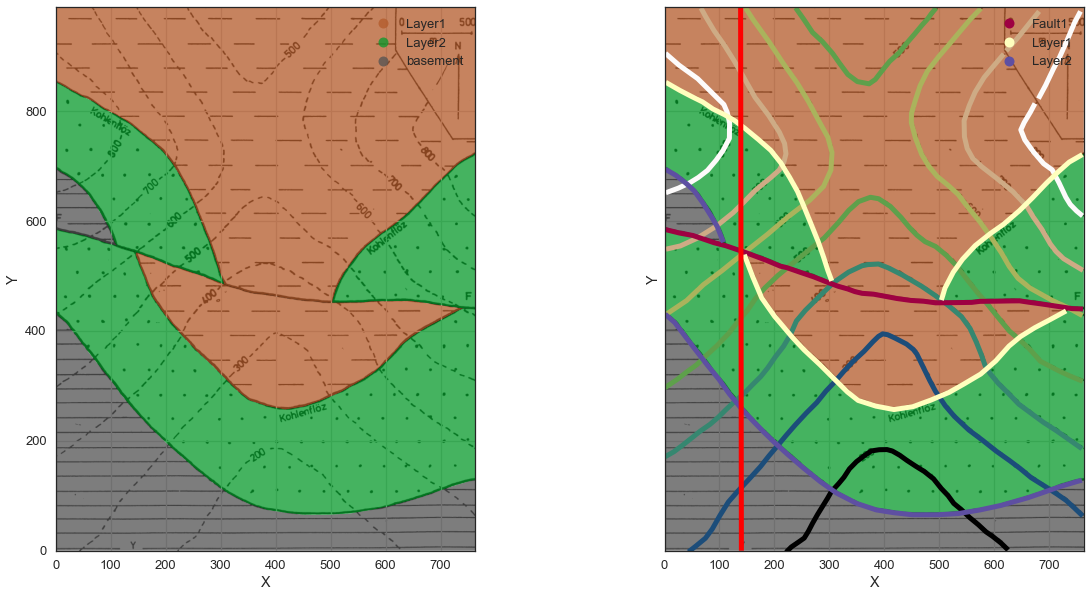

In [18]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_geolmap=True,
                           show_customsections=True,
                           show_contours=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_geolmap = cols, 
                           cmap_contours='gist_earth'
                           )

# Interpolate Topography

In [19]:
dem = gg.vector.interpolate_raster(topo, method='rbf')
geo_data.raw_dem = dem
geo_data.raw_dem

array([[762.30262041, 761.49519723, 760.68384212, ..., 798.93369054,
        799.82184818, 800.69465557],
       [762.62983672, 761.82442125, 761.0150659 , ..., 799.39857372,
        800.27936718, 801.1443121 ],
       [762.96146177, 762.15810352, 761.35079808, ..., 799.86714078,
        800.73958708, 801.59583551],
       ...,
       [336.24837125, 335.40847115, 334.5682545 , ..., 292.92538677,
        293.71648035, 294.51066913],
       [336.09252324, 335.25157714, 334.41028464, ..., 292.94574563,
        293.73674151, 294.53077309],
       [335.94385892, 335.10203526, 334.25984406, ..., 292.96922394,
        293.76010102, 294.55395647]])

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

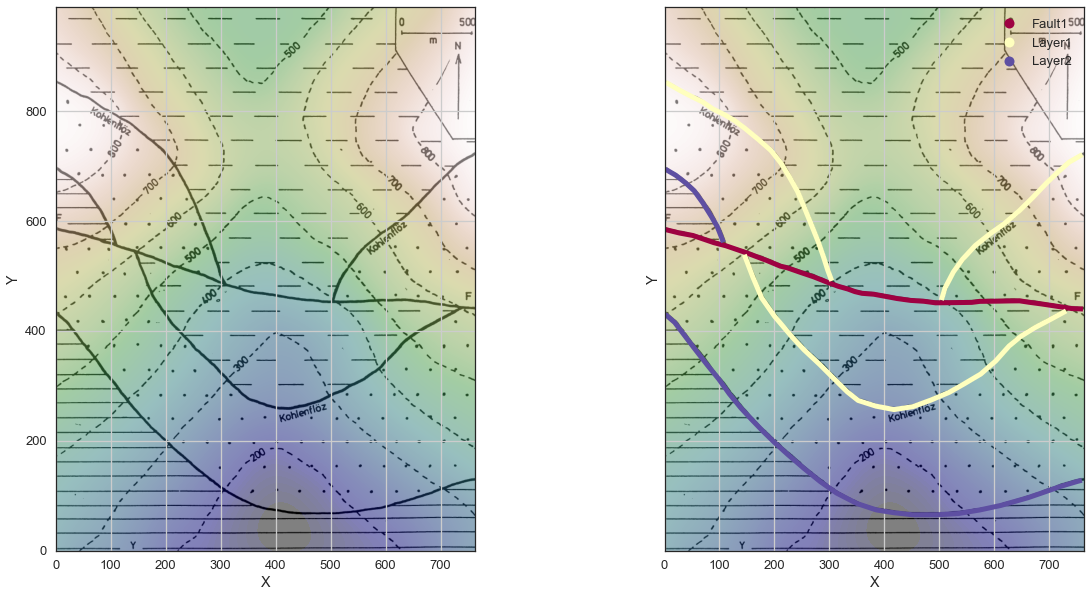

In [20]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_topo=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_contours='gist_earth'
                           )

# Save Topography as Raster

In [21]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example4/topo.tif',dem, crs='EPSG:4326', extent=[0,765,0,1000])

In [22]:
topography = rasterio.open('../../../gemgis/data/examples/example4/topo.tif')
topography

<open DatasetReader name='../../../gemgis/data/examples/example4/topo.tif' mode='r'>

# Set Interfaces

In [23]:
interfaces_coords = gg.vector.extract_coordinates(interfaces,np.flipud(dem), extent=geo_data.extent)
interfaces_coords.head()

,id,formation,geometry,points,X,Y,Z
0,None,Fault1,"LINESTRING (1.313 584.319, 27.510 577.887, 51....","(1.313299610144611, 584.3190758000997)",1.31,584.32,578.62
0,None,Fault1,"LINESTRING (1.313 584.319, 27.510 577.887, 51....","(27.510424697146597, 577.887446287722)",27.51,577.89,569.56
0,None,Fault1,"LINESTRING (1.313 584.319, 27.510 577.887, 51....","(51.511383609190325, 573.4951139378055)",51.51,573.50,557.99
0,None,Fault1,"LINESTRING (1.313 584.319, 27.510 577.887, 51....","(90.10116068345673, 560.318116888056)",90.10,560.32,541.07
0,None,Fault1,"LINESTRING (1.313 584.319, 27.510 577.887, 51....","(111.43534638305117, 554.8277014506605)",111.44,554.83,528.29


In [24]:
geo_data.to_gempy_df(interfaces_coords.sample(n=85), 'interfaces')
geo_data.interfaces

,index,X,Y,Z,formation
0,2,49.47,826.21,370.45,Layer1
1,5,200.85,196.23,688.48,Layer2
2,0,573.89,453.65,554.19,Fault1
3,5,160.06,237.01,753.86,Layer2
4,1,53.86,654.91,496.55,Layer2
...,...,...,...,...,...
80,0,247.75,506.20,443.41,Fault1
81,4,332.78,288.78,570.15,Layer1
82,2,170.89,748.09,349.49,Layer1
83,2,2.10,852.25,382.30,Layer1


# Set Orientations

As orientations were not loaded, they have to be calculated based on strike lines provided for the lithological layers and the fault. 

## Load Fault Data and Calculate Orientations

In [25]:
strike_fault = gpd.read_file('../../../gemgis/data/examples/example4/lines_strike_fault.shp')
strike_fault

,id,Z,formation,geometry
0,1,400,Fault1,"LINESTRING (306.110 484.786, 511.198 451.597)"
1,2,500,Fault1,"LINESTRING (223.696 514.599, 583.462 453.789)"
2,3,600,Fault1,"LINESTRING (146.764 542.741, 740.718 440.638)"


<AxesSubplot:xlabel='X', ylabel='Y'>

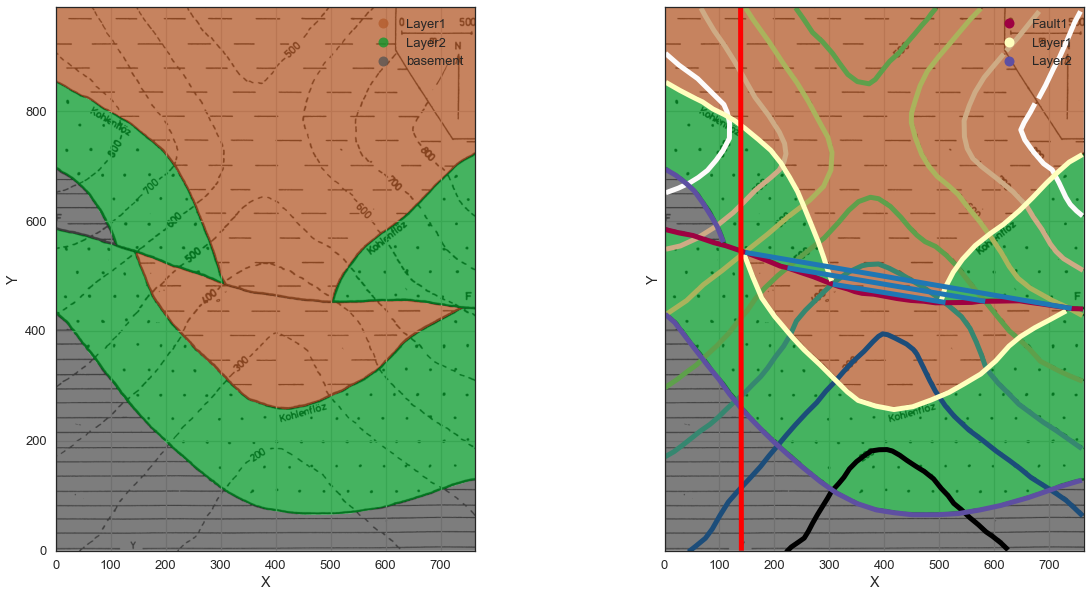

In [26]:
fix, ax1, ax2 = gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_geolmap=True,
                           show_customsections=True,
                           show_contours=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_geolmap = cols, 
                           cmap_contours='gist_earth'
                           )


strike_fault.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5, aspect='equal')


Based on the strike lines and the calculated angles, we can conclude that the fault is dipping towards the south. Please take into account that the map was not digitized to scale. So angles are usually higher than expected for certain types of faults!

In [27]:
orientations_fault = gg.utils.calculate_orientations(strike_fault)
orientations_fault 

,X,Y,Z,dip,azimuth,polarity,formation
0,406.12,476.19,450.00,81.50,189.50,1,Fault1
1,423.66,487.94,550.00,81.94,189.71,1,Fault1


## Load Layer Data 
For the strike of the different layers we have to distinguish between layer 1 and layer 2 and between the two fault blocks. 

In [28]:
strike_layers = gpd.read_file('../../../gemgis/data/examples/example4/lines_strike_layers.shp')
strike_layers

,id,Z,formation,geometry
0,1,300,Layer1,"LINESTRING (311.657 309.826, 497.763 279.280)"
1,2,400,Layer1,"LINESTRING (228.787 392.414, 586.856 331.605)"
2,3,500,Layer1,"LINESTRING (173.917 467.931, 644.272 386.192)"
3,4,600,Layer1,"LINESTRING (147.613 542.600, 740.436 440.496)"
4,1,200,Layer2,"LINESTRING (306.708 109.579, 546.835 69.416)"
5,2,300,Layer2,"LINESTRING (205.736 192.450, 205.736 192.450, ..."
6,3,400,Layer2,"LINESTRING (128.522 273.623, 763.204 175.762)"
7,4,500,Layer2,"LINESTRING (69.126 348.292, 760.941 241.946, 7..."
8,5,600,Layer2,"LINESTRING (2.943 428.617, 2.943 428.617, 2.94..."
9,5,500,Layer1,"LINESTRING (280.687 560.701, 532.976 517.710)"


<AxesSubplot:xlabel='X', ylabel='Y'>

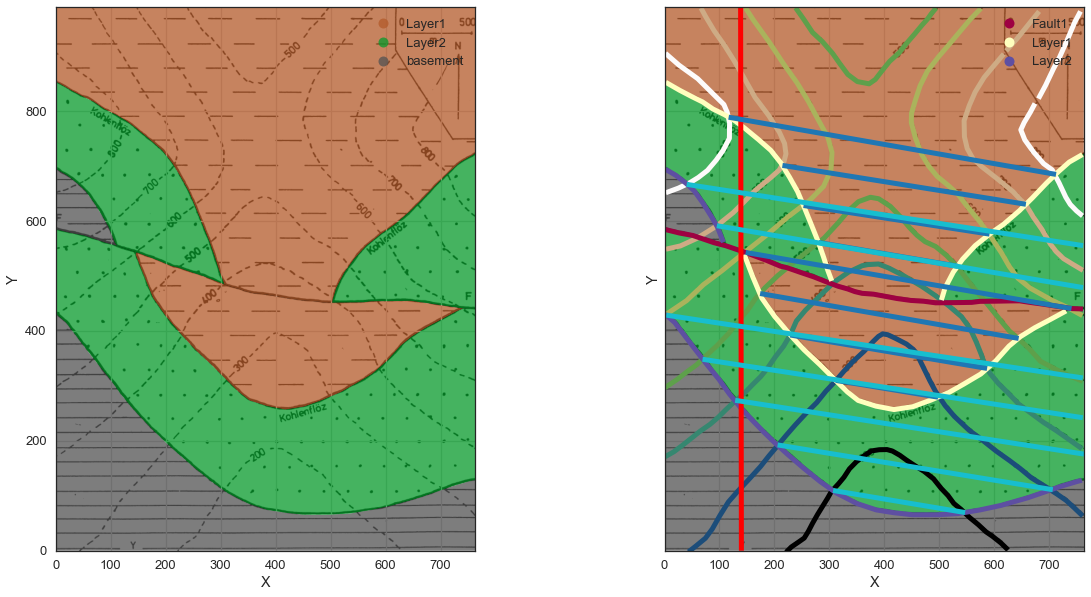

In [29]:
fix, ax1, ax2 = gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_geolmap=True,
                           show_customsections=True,
                           show_contours=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_geolmap = cols, 
                           cmap_contours='gist_earth'
                           )

strike_layers.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5, aspect='equal')


## Separate Layers

In [30]:
gdf1 = strike_layers[strike_layers['formation'] == 'Layer1']
gdf1

,id,Z,formation,geometry
0,1,300,Layer1,"LINESTRING (311.657 309.826, 497.763 279.280)"
1,2,400,Layer1,"LINESTRING (228.787 392.414, 586.856 331.605)"
2,3,500,Layer1,"LINESTRING (173.917 467.931, 644.272 386.192)"
3,4,600,Layer1,"LINESTRING (147.613 542.600, 740.436 440.496)"
9,5,500,Layer1,"LINESTRING (280.687 560.701, 532.976 517.710)"
10,6,600,Layer1,"LINESTRING (252.969 628.016, 591.240 575.974)"
11,7,700,Layer1,"LINESTRING (214.503 700.987, 657.423 630.279)"
12,8,800,Layer1,"LINESTRING (116.642 788.666, 712.293 684.583)"


In [31]:
gdf2 = strike_layers[strike_layers['formation'] == 'Layer2']
gdf2

,id,Z,formation,geometry
4,1,200,Layer2,"LINESTRING (306.708 109.579, 546.835 69.416)"
5,2,300,Layer2,"LINESTRING (205.736 192.450, 205.736 192.450, ..."
6,3,400,Layer2,"LINESTRING (128.522 273.623, 763.204 175.762)"
7,4,500,Layer2,"LINESTRING (69.126 348.292, 760.941 241.946, 7..."
8,5,600,Layer2,"LINESTRING (2.943 428.617, 2.943 428.617, 2.94..."
13,6,800,Layer2,"LINESTRING (40.277 666.482, 761.507 555.044)"
14,7,700,Layer2,"LINESTRING (95.147 591.247, 761.507 478.679)"


In [32]:
gdf1_south = gdf1[gdf1['id']<= 4]
gdf1_south

,id,Z,formation,geometry
0,1,300,Layer1,"LINESTRING (311.657 309.826, 497.763 279.280)"
1,2,400,Layer1,"LINESTRING (228.787 392.414, 586.856 331.605)"
2,3,500,Layer1,"LINESTRING (173.917 467.931, 644.272 386.192)"
3,4,600,Layer1,"LINESTRING (147.613 542.600, 740.436 440.496)"


In [33]:
gdf1_north = gdf1[gdf1['id']> 4]
gdf1_north

,id,Z,formation,geometry
9,5,500,Layer1,"LINESTRING (280.687 560.701, 532.976 517.710)"
10,6,600,Layer1,"LINESTRING (252.969 628.016, 591.240 575.974)"
11,7,700,Layer1,"LINESTRING (214.503 700.987, 657.423 630.279)"
12,8,800,Layer1,"LINESTRING (116.642 788.666, 712.293 684.583)"


In [34]:
gdf2_south = gdf2[gdf2['id']<= 5]
gdf2_south

,id,Z,formation,geometry
4,1,200,Layer2,"LINESTRING (306.708 109.579, 546.835 69.416)"
5,2,300,Layer2,"LINESTRING (205.736 192.450, 205.736 192.450, ..."
6,3,400,Layer2,"LINESTRING (128.522 273.623, 763.204 175.762)"
7,4,500,Layer2,"LINESTRING (69.126 348.292, 760.941 241.946, 7..."
8,5,600,Layer2,"LINESTRING (2.943 428.617, 2.943 428.617, 2.94..."


In [35]:
gdf2_north = gdf2[gdf2['id']> 5]
gdf2_north

,id,Z,formation,geometry
13,6,800,Layer2,"LINESTRING (40.277 666.482, 761.507 555.044)"
14,7,700,Layer2,"LINESTRING (95.147 591.247, 761.507 478.679)"


## Calculate Orientations

In [36]:
orientations1_south = gg.utils.calculate_orientations(gdf1_south)
orientations1_south

,X,Y,Z,dip,azimuth,polarity,formation
0,406.27,328.28,350.00,56.16,189.57,1,Layer1
1,408.46,394.54,450.00,57.25,189.78,1,Layer1
2,426.56,459.30,550.00,55.20,189.81,1,Layer1


In [37]:
orientations1_north = gg.utils.calculate_orientations(gdf1_north)
orientations1_north

,X,Y,Z,dip,azimuth,polarity,formation
0,414.47,570.60,550.00,57.20,189.08,1,Layer1
1,429.03,633.81,650.00,56.97,188.95,1,Layer1
2,425.22,701.13,750.00,56.39,189.61,1,Layer1


In [38]:
orientations2_south = gg.utils.calculate_orientations(gdf2_south)
orientations2_south

,X,Y,Z,dip,azimuth,polarity,formation
0,483.44,128.12,271.43,56.52,189.26,1,Layer2
1,488.89,166.75,328.57,54.76,189.05,1,Layer2
2,496.55,256.31,460.00,57.00,188.75,1,Layer2
3,337.25,347.48,557.14,54.82,188.64,1,Layer2


In [39]:
orientations2_north = gg.utils.calculate_orientations(gdf2_north)
orientations2_north

,X,Y,Z,dip,azimuth,polarity,formation
0,414.61,572.86,750.00,54.78,189.15,1,Layer2


## Merge DataFrames

In [40]:
orientations_coords = pd.concat([orientations_fault, orientations1_south, orientations1_north, orientations2_south, orientations2_north]).reset_index()
orientations_coords

,index,X,Y,Z,dip,azimuth,polarity,formation
0,0,406.12,476.19,450.00,81.50,189.50,1,Fault1
1,1,423.66,487.94,550.00,81.94,189.71,1,Fault1
2,0,406.27,328.28,350.00,56.16,189.57,1,Layer1
3,1,408.46,394.54,450.00,57.25,189.78,1,Layer1
4,2,426.56,459.30,550.00,55.20,189.81,1,Layer1
5,0,414.47,570.60,550.00,57.20,189.08,1,Layer1
6,1,429.03,633.81,650.00,56.97,188.95,1,Layer1
7,2,425.22,701.13,750.00,56.39,189.61,1,Layer1
8,0,483.44,128.12,271.43,56.52,189.26,1,Layer2
9,1,488.89,166.75,328.57,54.76,189.05,1,Layer2


In [41]:
geo_data.raw_o = gpd.GeoDataFrame(orientations_coords, 
                                        geometry=gpd.points_from_xy(orientations_coords.X, orientations_coords.Y))
geo_data.raw_o

,index,X,Y,Z,dip,azimuth,polarity,formation,geometry
0,0,406.12,476.19,450.00,81.50,189.50,1,Fault1,POINT (406.116 476.193)
1,1,423.66,487.94,550.00,81.94,189.71,1,Fault1,POINT (423.660 487.942)
2,0,406.27,328.28,350.00,56.16,189.57,1,Layer1,POINT (406.266 328.281)
3,1,408.46,394.54,450.00,57.25,189.78,1,Layer1,POINT (408.458 394.535)
4,2,426.56,459.30,550.00,55.20,189.81,1,Layer1,POINT (426.559 459.305)
5,0,414.47,570.60,550.00,57.20,189.08,1,Layer1,POINT (414.468 570.600)
6,1,429.03,633.81,650.00,56.97,188.95,1,Layer1,POINT (429.034 633.814)
7,2,425.22,701.13,750.00,56.39,189.61,1,Layer1,POINT (425.216 701.129)
8,0,483.44,128.12,271.43,56.52,189.26,1,Layer2,POINT (483.439 128.125)
9,1,488.89,166.75,328.57,54.76,189.05,1,Layer2,POINT (488.894 166.752)


<AxesSubplot:xlabel='X', ylabel='Y'>

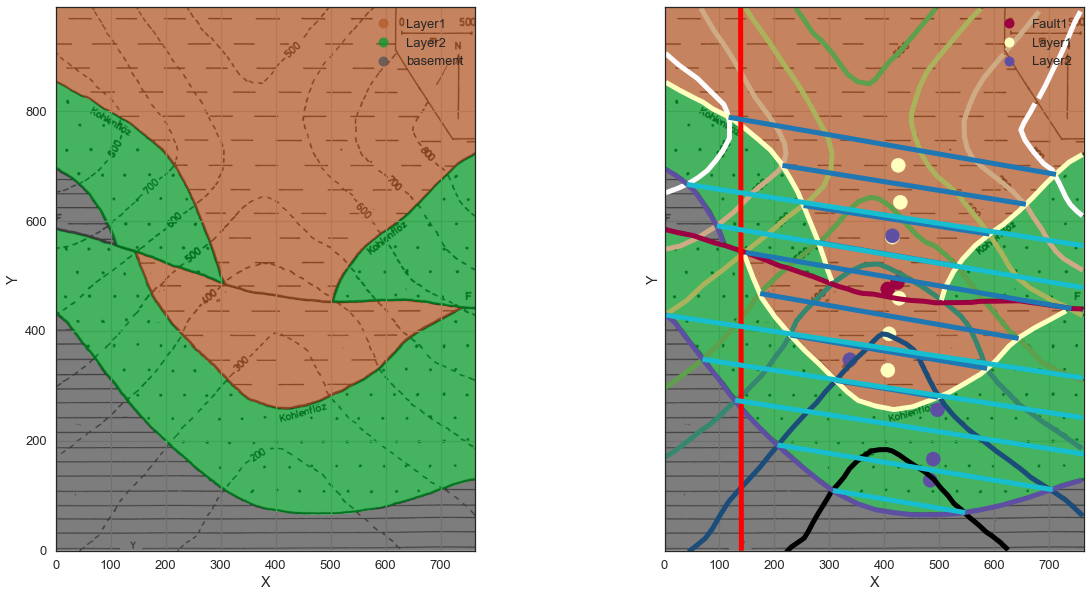

In [42]:
fix, ax1, ax2 = gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_geolmap=True,
                           show_customsections=True,
                           show_contours=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_geolmap = cols, 
                           cmap_contours='gist_earth'
                           )



strike_layers.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5, aspect='equal')


In [43]:
geo_data.orientations = orientations_coords
geo_data.orientations

,index,X,Y,Z,dip,azimuth,polarity,formation,geometry
0,0,406.12,476.19,450.00,81.50,189.50,1,Fault1,POINT (406.116 476.193)
1,1,423.66,487.94,550.00,81.94,189.71,1,Fault1,POINT (423.660 487.942)
2,0,406.27,328.28,350.00,56.16,189.57,1,Layer1,POINT (406.266 328.281)
3,1,408.46,394.54,450.00,57.25,189.78,1,Layer1,POINT (408.458 394.535)
4,2,426.56,459.30,550.00,55.20,189.81,1,Layer1,POINT (426.559 459.305)
5,0,414.47,570.60,550.00,57.20,189.08,1,Layer1,POINT (414.468 570.600)
6,1,429.03,633.81,650.00,56.97,188.95,1,Layer1,POINT (429.034 633.814)
7,2,425.22,701.13,750.00,56.39,189.61,1,Layer1,POINT (425.216 701.129)
8,0,483.44,128.12,271.43,56.52,189.26,1,Layer2,POINT (483.439 128.125)
9,1,488.89,166.75,328.57,54.76,189.05,1,Layer2,POINT (488.894 166.752)


# Check Data Class

In [44]:
vars(geo_data)

{'model_name': 'Model4',
 'crs': 'EPSG:4326',
 'extent': [0.0, 763.0, 0.0, 989.0, 100, 900],
 'resolution': [50, 50, 50],
 'interfaces':     index      X      Y      Z formation
 0       2  49.47 826.21 370.45    Layer1
 1       5 200.85 196.23 688.48    Layer2
 2       0 573.89 453.65 554.19    Fault1
 3       5 160.06 237.01 753.86    Layer2
 4       1  53.86 654.91 496.55    Layer2
 ..    ...    ...    ...    ...       ...
 80      0 247.75 506.20 443.41    Fault1
 81      4 332.78 288.78 570.15    Layer1
 82      2 170.89 748.09 349.49    Layer1
 83      2   2.10 852.25 382.30    Layer1
 84      5 534.67  67.59 617.69    Layer2
 
 [85 rows x 5 columns],
 'orientations':     index      X      Y      Z   dip  azimuth  polarity formation  \
 0       0 406.12 476.19 450.00 81.50   189.50         1    Fault1   
 1       1 423.66 487.94 550.00 81.94   189.71         1    Fault1   
 2       0 406.27 328.28 350.00 56.16   189.57         1    Layer1   
 3       1 408.46 394.54 450.00 57.25 

# Add Section Dict

In [45]:
geo_data.to_section_dict(custom_section, 'section')
geo_data.section_dict

{'Section1': ([139.83498503826536, 0.0],
  [138.42080896823512, 989.0],
  [100, 80])}

# Add Surface Colors

In [46]:
geo_data.to_surface_color_dict('../../../gemgis/data/examples/example4/style4.qml')
geo_data.surface_colors

{'basement': '#525252', 'Layer1': '#b35a2a', 'Layer2': '#069a2b'}

# Add Stack

In [47]:
geo_data.stack = {  "Fault1": ('Fault1'),
                    "Strat_Series": ('Layer2', 'Layer1'),
                    "basement": ('basement')}
geo_data.stack

{'Fault1': 'Fault1',
 'Strat_Series': ('Layer2', 'Layer1'),
 'basement': 'basement'}

# Add DEM

In [48]:
geo_data.dem = '../../../gemgis/data/examples/example4/raster4.tif'
geo_data.dem

'../../../gemgis/data/examples/example4/raster4.tif'

# Visualize Data Set

In [49]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(dem, p, cmap = 'gist_earth', extent=geo_data.extent[:4])
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 20)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

ValueError: Input point array shapes must match exactly

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [ ]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [ ]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

In [ ]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

In [ ]:
geo_model.surfaces

In [ ]:
geo_data.stack

In [ ]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

In [ ]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

In [ ]:
gp.plot_2d(geo_model, direction = 'z')
plt.grid()

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [ ]:
geo_model.set_topography(
    source='gdal', filepath='../../../gemgis/data/examples/example4/topo.tif')

In [ ]:
geo_model.set_section_grid(geo_data.section_dict)

In [ ]:
gp.plot.plot_section_traces(geo_model)

In [ ]:
geo_model.set_is_fault(['Fault1'])

In [ ]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

In [ ]:
sol = gp.compute_model(geo_model)
sol

In [ ]:
geo_model.surfaces.df

The geological map had to be created manually as there seems to be a bug when creating the geological map with `GemGIS`. This was reported already: https://github.com/cgre-aachen/gempy/issues/446

In [ ]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#069a2b', '#b35a2a','#525252', ]
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

In [ ]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True, ve = 0.4)

In [ ]:
gp.plot_2d(geo_model, direction='x', show_topography=True, cell_number=25, ve=0.4)

In [ ]:
gp.plot_2d(geo_model, direction='y', show_topography=True, cell_number = 25)

In [ ]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, ve = 0.4)

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [ ]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

## Plot Polygons

In [ ]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [ ]:
gdf.to_file('../../../gemgis/data/examples/example4/liths.shp')

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [ ]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example4/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')

# Create borehole from Geo_Model

Geological models are used to extract information from the subsurface. As geologists, we like to look of the result of the model at a single location and down to the maximum z extent in depth. This is termed a borehole or in the case of fluid extraction a well. These boreholes can easily be extracted and displayed using GemGIS. All you need is the `geo_model` object, the `geo_data` object and the location of your borehole, optionally with its maximum depth. 

In [ ]:
sol = gg.post.extract_borehole(geo_model, geo_data, [250,500])
sol

# Depth Maps

Depth maps indicate the depth of a surface within the model extent. By applying an intuitive color coding, the spatial position of the respective surface can easily be interpreted. Depth maps can easily be created by executing `gg.visualization.plot_depth_map(...)`. All that is needed is the `geo_model` object and the name of the surface to be plotted. Optionally, a range for the colorbar can be provided to make the maps of different surfaces comparable. Otherwise, the min and max values of each surface are taken for the limits of the color bar. By setting `notebook` to `False` an interactive PyVista Window is opened (press 'Q' to close window safely again).

## Depth Map Layer1

In [ ]:
gg.visualization.plot_depth_map(geo_model, 'Layer1', clim=[100, 900], notebook=True)

## Depth Map Layer2

In [ ]:
gg.visualization.plot_depth_map(geo_model, 'Layer2', clim=[100, 900], notebook=True)